<a href="https://colab.research.google.com/github/EronDS/CoffeApp/blob/main/notebooks/coffeScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''imgs_ = [] 
data = []
fruits_folder = '/content/drive/MyDrive/coffe_fruits_scale/fruits' 

# use tqdm as a wrapper for your loop
for i in tqdm(os.listdir(fruits_folder)):
    # join the file name with the folder path
    img_path = os.path.join(fruits_folder, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # resize only once
    img_ = cv2.resize(img, (28, 28)) / 255.0
    # flatten the image vector if needed
    img_vector = img_.reshape(-1) # divide by 255 here
    # use imgs_ instead of imgs
    imgs_.append(img_)
    data.append(img_vector)


'''

"imgs_ = [] \ndata = []\nfruits_folder = '/content/drive/MyDrive/coffe_fruits_scale/fruits' \n\n# use tqdm as a wrapper for your loop\nfor i in tqdm(os.listdir(fruits_folder)):\n    # join the file name with the folder path\n    img_path = os.path.join(fruits_folder, i)\n    img = cv2.imread(img_path)\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    # resize only once\n    img_ = cv2.resize(img, (28, 28)) / 255.0\n    # flatten the image vector if needed\n    img_vector = img_.reshape(-1) # divide by 255 here\n    # use imgs_ instead of imgs\n    imgs_.append(img_)\n    data.append(img_vector)\n\n\n"

In [ ]:
#np.save(fruits_folder+'/'+'imgs_.npy', imgs_)
#np.save(fruits_folder+'/'+'data.npy', data)

In [ ]:
import cv2
import sklearn
import os
from tqdm import tqdm
import numpy as np
import pickle
from google.colab.patches import cv2_imshow

In [ ]:
fruits_folder = '/content/drive/MyDrive/coffe_fruits_scale/fruits' 
data = np.load(fruits_folder+'/'+'data.npy')

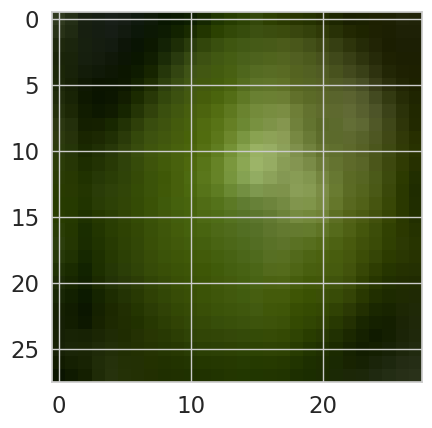

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.resize(data[0], (28,28,3)))

In [ ]:
data[0]

array([0.18823529, 0.22745098, 0.12156863, ..., 0.16078431, 0.19215686,
       0.09803922])

In [ ]:
data_lab = [] 

for i in range(len(data)):
    img_rgb = np.resize(data[i], (28,28,3)) * 255
    img_rgb = img_rgb.astype(np.uint8)
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    data_lab.append(img_lab)

In [ ]:
data_a = [] 



for i in range(len(data_lab)):
    img_lab = data_lab[i]
    img_ab = img_lab[:, :, 1]  # extract a,b channels from LAB image
    img_ab_vect = np.reshape(img_ab, (28*28*1))  # vectorize a,b channels
    img_ab_vect = img_ab_vect.astype('float32')  # convert to float32
    img_ab_vect /= 255.0  # normalize to [0, 1]
    data_a.append(img_ab_vect)


In [ ]:
data_ab = []

for i in range(len(data_lab)):
    img_lab = data_lab[i]    
    img_ab = img_lab[:, :, 1:]  # extract a,b channels from LAB image
    img_ab_vect = np.reshape(img_ab, (28*28*2))  # vectorize a,b channels
    img_ab_vect = img_ab_vect.astype('float32')  # convert to float32
    img_ab_vect /= 255.0  # normalize to [0, 1]
    data_ab.append(img_ab_vect)

In [ ]:
vect_ab = data_ab
vect_ab = np.array(vect_ab)
vect_ab.shape

(38908, 1568)

In [ ]:
from sklearn.model_selection import train_test_split
vect_ab = data_ab
x_train,x_test = train_test_split(vect_ab,test_size=.1)

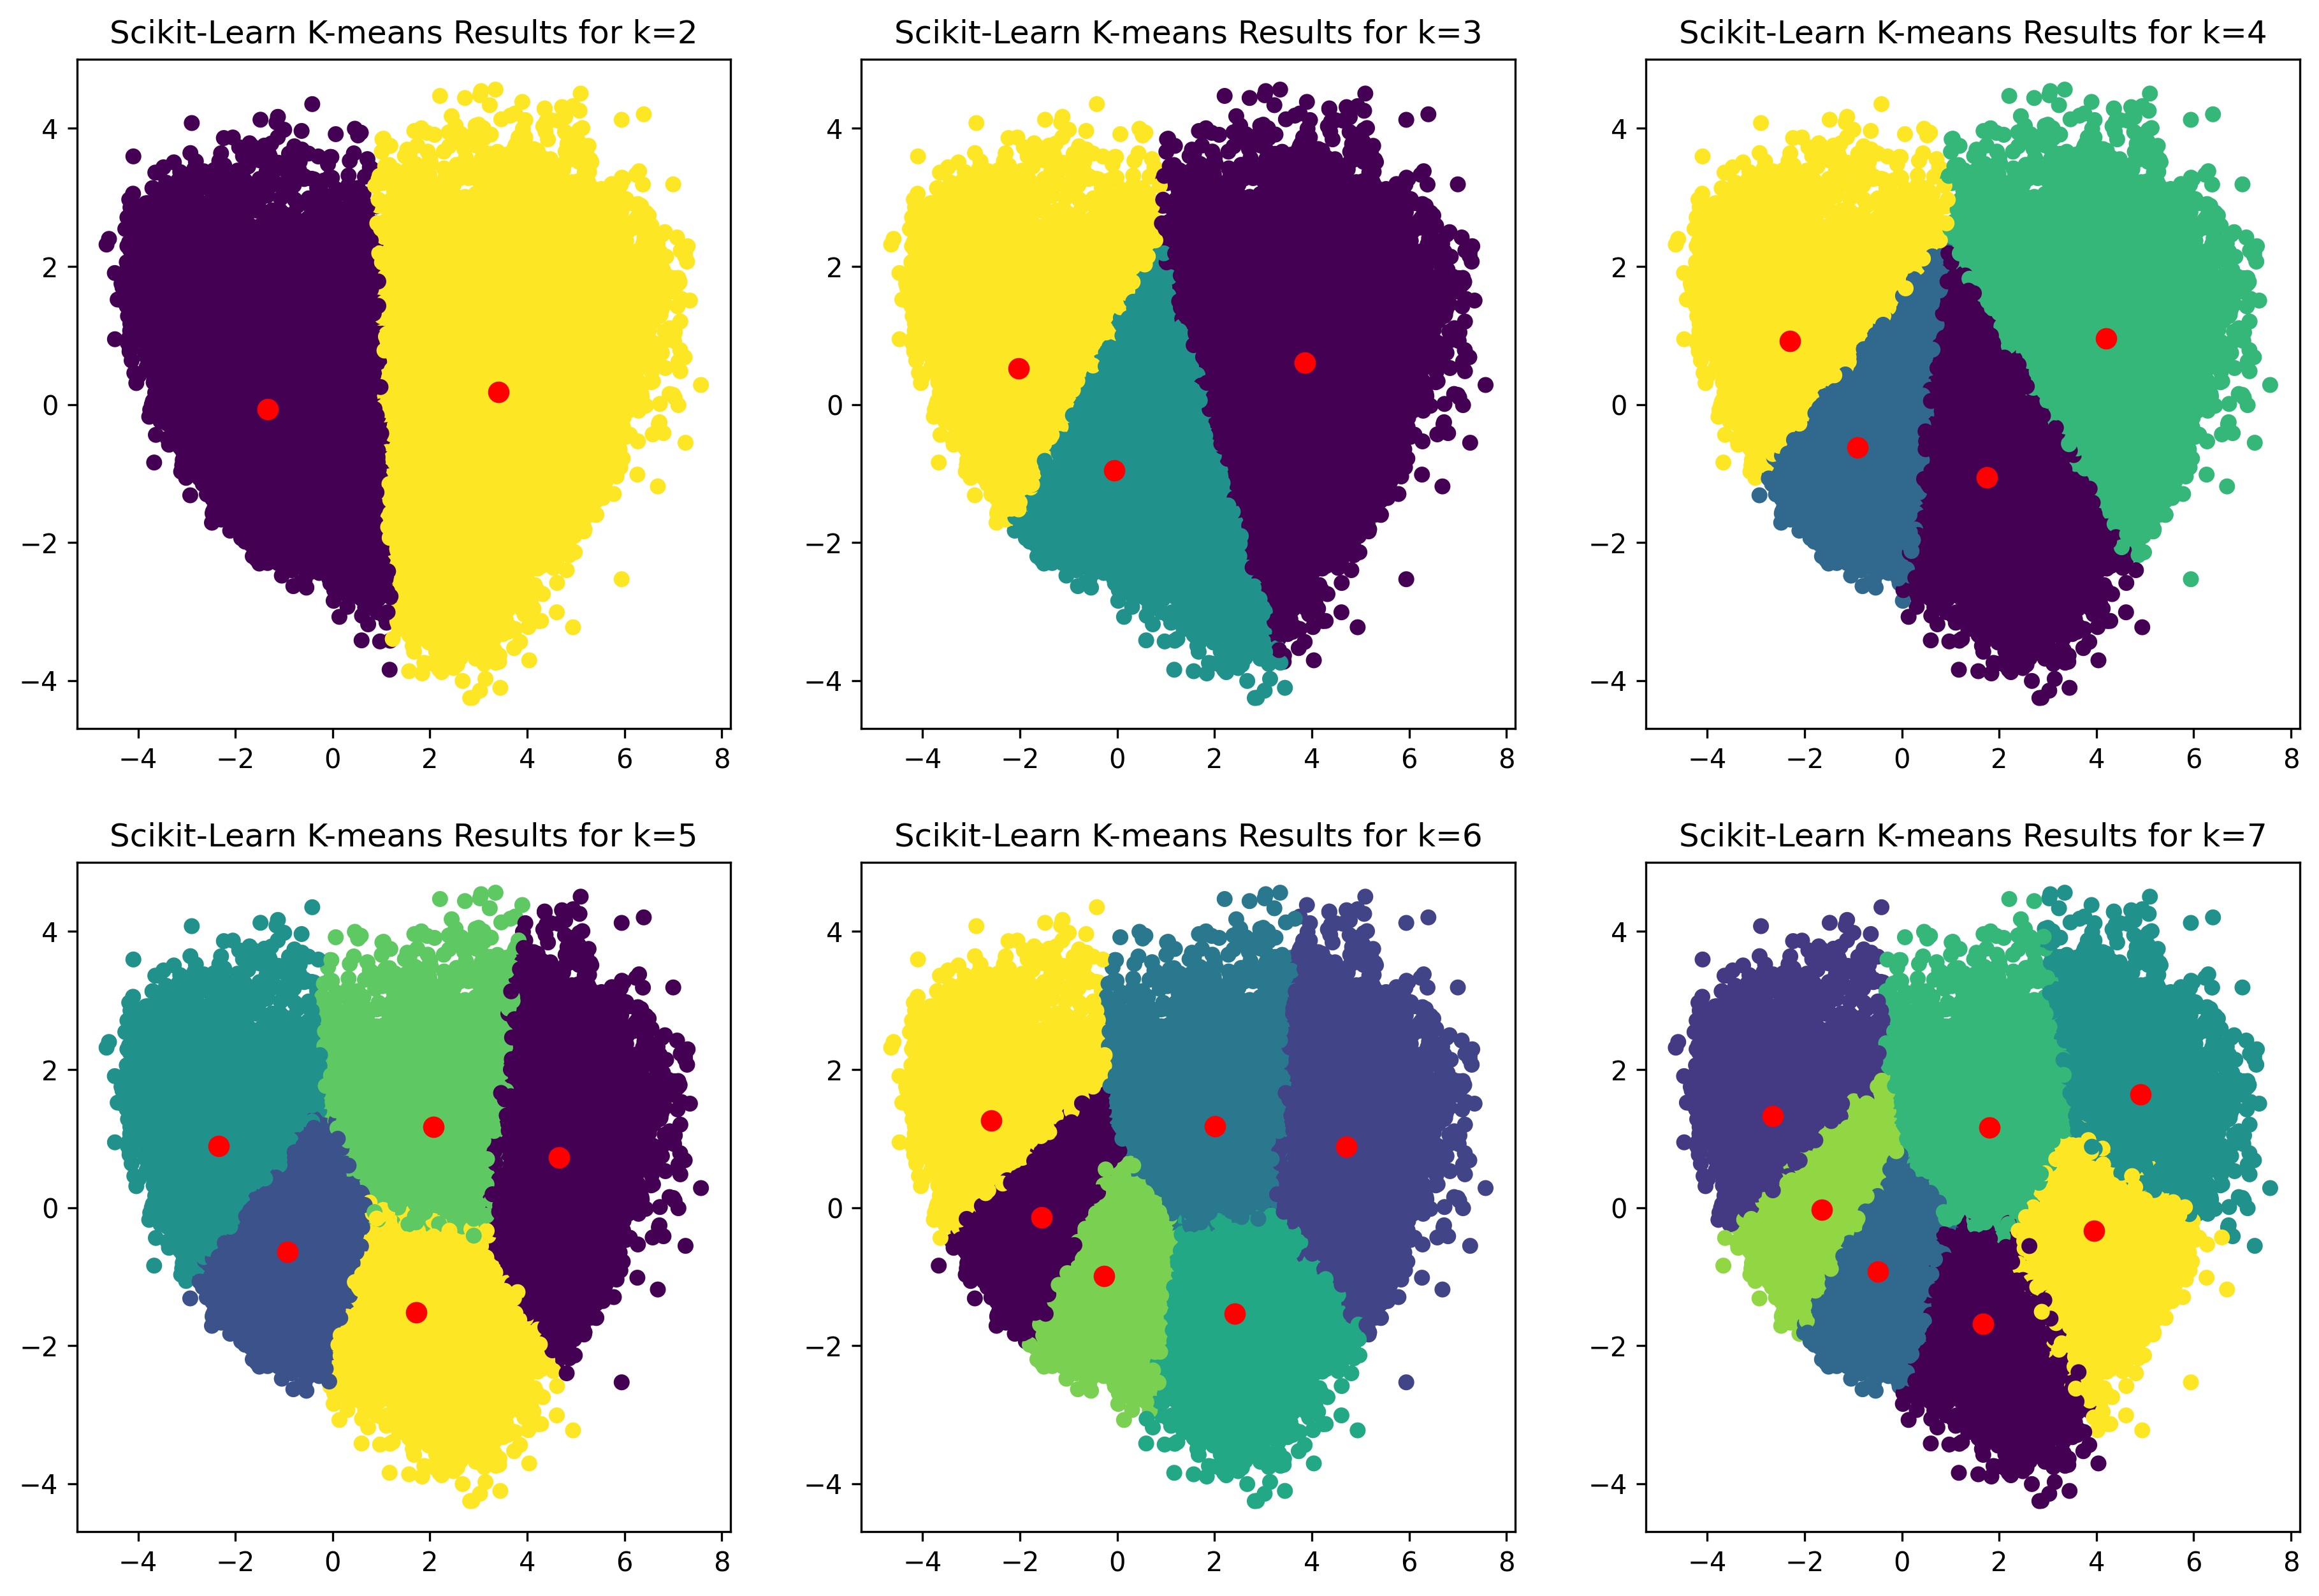

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # import PCA class

epochs = 100

X = data_ab
X = np.array(X)
# create a list of k values to iterate over
k_values = [2, 3, 4, 5, 6 ,7]

# create a figure with multiple subplots
fig = plt.figure(figsize=(15,10))
fig.set_dpi(300)

# create an empty dictionary to store the models
models = {}
wss_values = []

# loop over the k values
for i,k in enumerate(k_values):
    # fit the k-means model with the current k value
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0, max_iter=epochs).fit(X)    
    wss_values.append(kmeans.inertia_)
    # save the model to the dictionary with k as the key
    models[k] = kmeans

    # create a subplot for the current k value
    ax = fig.add_subplot(2 ,3 ,i+1)
    
    # apply PCA to reduce dimensionality to 2 
    pca = PCA(n_components=2)
    
    # transform the data into PCA space using pca.fit_transform()
    X_pca = pca.fit_transform(X)
    
    # plot the data points with their assigned cluster colors using kmeans.labels_
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=25)
    
    # plot the cluster centers with red markers using pca.transform() on kmeans.cluster_centers_
    for center in pca.transform(kmeans.cluster_centers_):
        ax.scatter(center[0], center[1], c='red', s=50)
    
    # set the title of the subplot with the current k value
    ax.set_title(f"Scikit-Learn K-means Results for k={k}")
# show the figure with all subplots   
plt.show()

É um número ótimo de clusters porque ele representa um ponto de equilíbrio entre a compressibilidade e a precisão dos clusters1. Se o número de clusters for muito baixo, os dados serão agrupados de forma inadequada e perderão detalhes importantes. Se o número de clusters for muito alto, os dados serão divididos em grupos muito pequenos e perderão generalização2. O número ótimo de clusters é aquele que minimiza a variância dentro dos grupos e maximiza a variância entre os grupos3.

In [ ]:
wss_values

[182322.96875,
 145368.84375,
 127006.8515625,
 117616.765625,
 110098.4140625,
 104417.171875]

In [ ]:
wss_values = [182322.96875,
 145368.84375,
 127006.8515625,
 117616.765625,
 110098.4140625,
 104417.171875]

In [ ]:
k_values = [2, 3, 4, 5, 6 ,7]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette of the plot
sns.set_style("whitegrid")
sns.set_palette("Blues", 1)

# Set the context of the plot

# Create the figure with a custom size and dpi
fig = plt.figure(figsize=(20,10))
fig.set_dpi(300)

# Plot the data with some transparency and markersize
sns.lineplot(x=k_values, y=wss_values, marker='o', alpha=0.8, markersize=10)

# Set the labels and title with a custom font size and family
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WSS)")
plt.title("Elbow method for optimal k")

# Draw a vertical line at k=4
plt.axvline(4)

# Add a grid to the plot
plt.grid()
sns.despine(top=True)
plt.tight_layout()

In [ ]:
models = {} 

for i in os.listdir('/content/drive/MyDrive/coffe_fruits_scale/models'):
    with open('/content/drive/MyDrive/coffe_fruits_scale/models/' + i, 'rb') as f :
        models[i[-5]] = pickle.load(f)

In [ ]:
models

{'2': KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=0),
 '4': KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=0),
 '7': KMeans(max_iter=100, n_clusters=7, n_init=10, random_state=0),
 '6': KMeans(max_iter=100, n_clusters=6, n_init=10, random_state=0),
 '5': KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=0),
 '3': KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=0)}

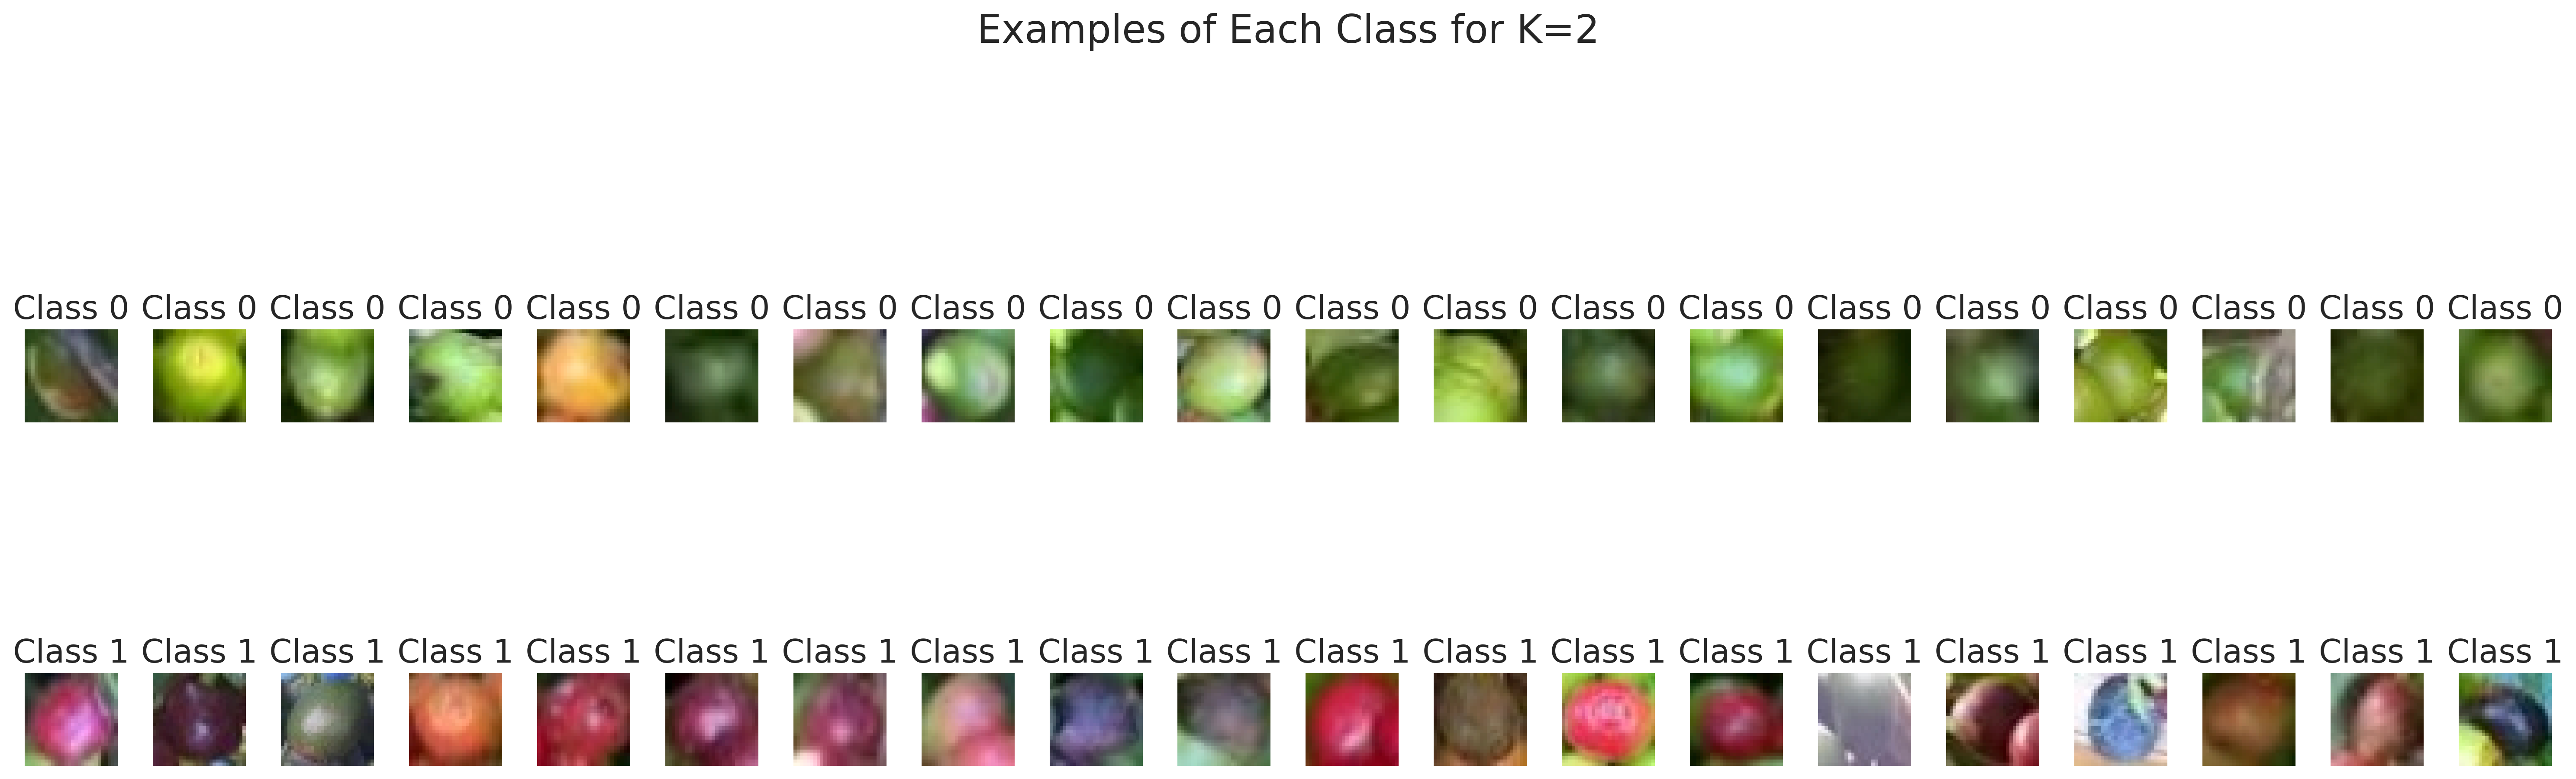

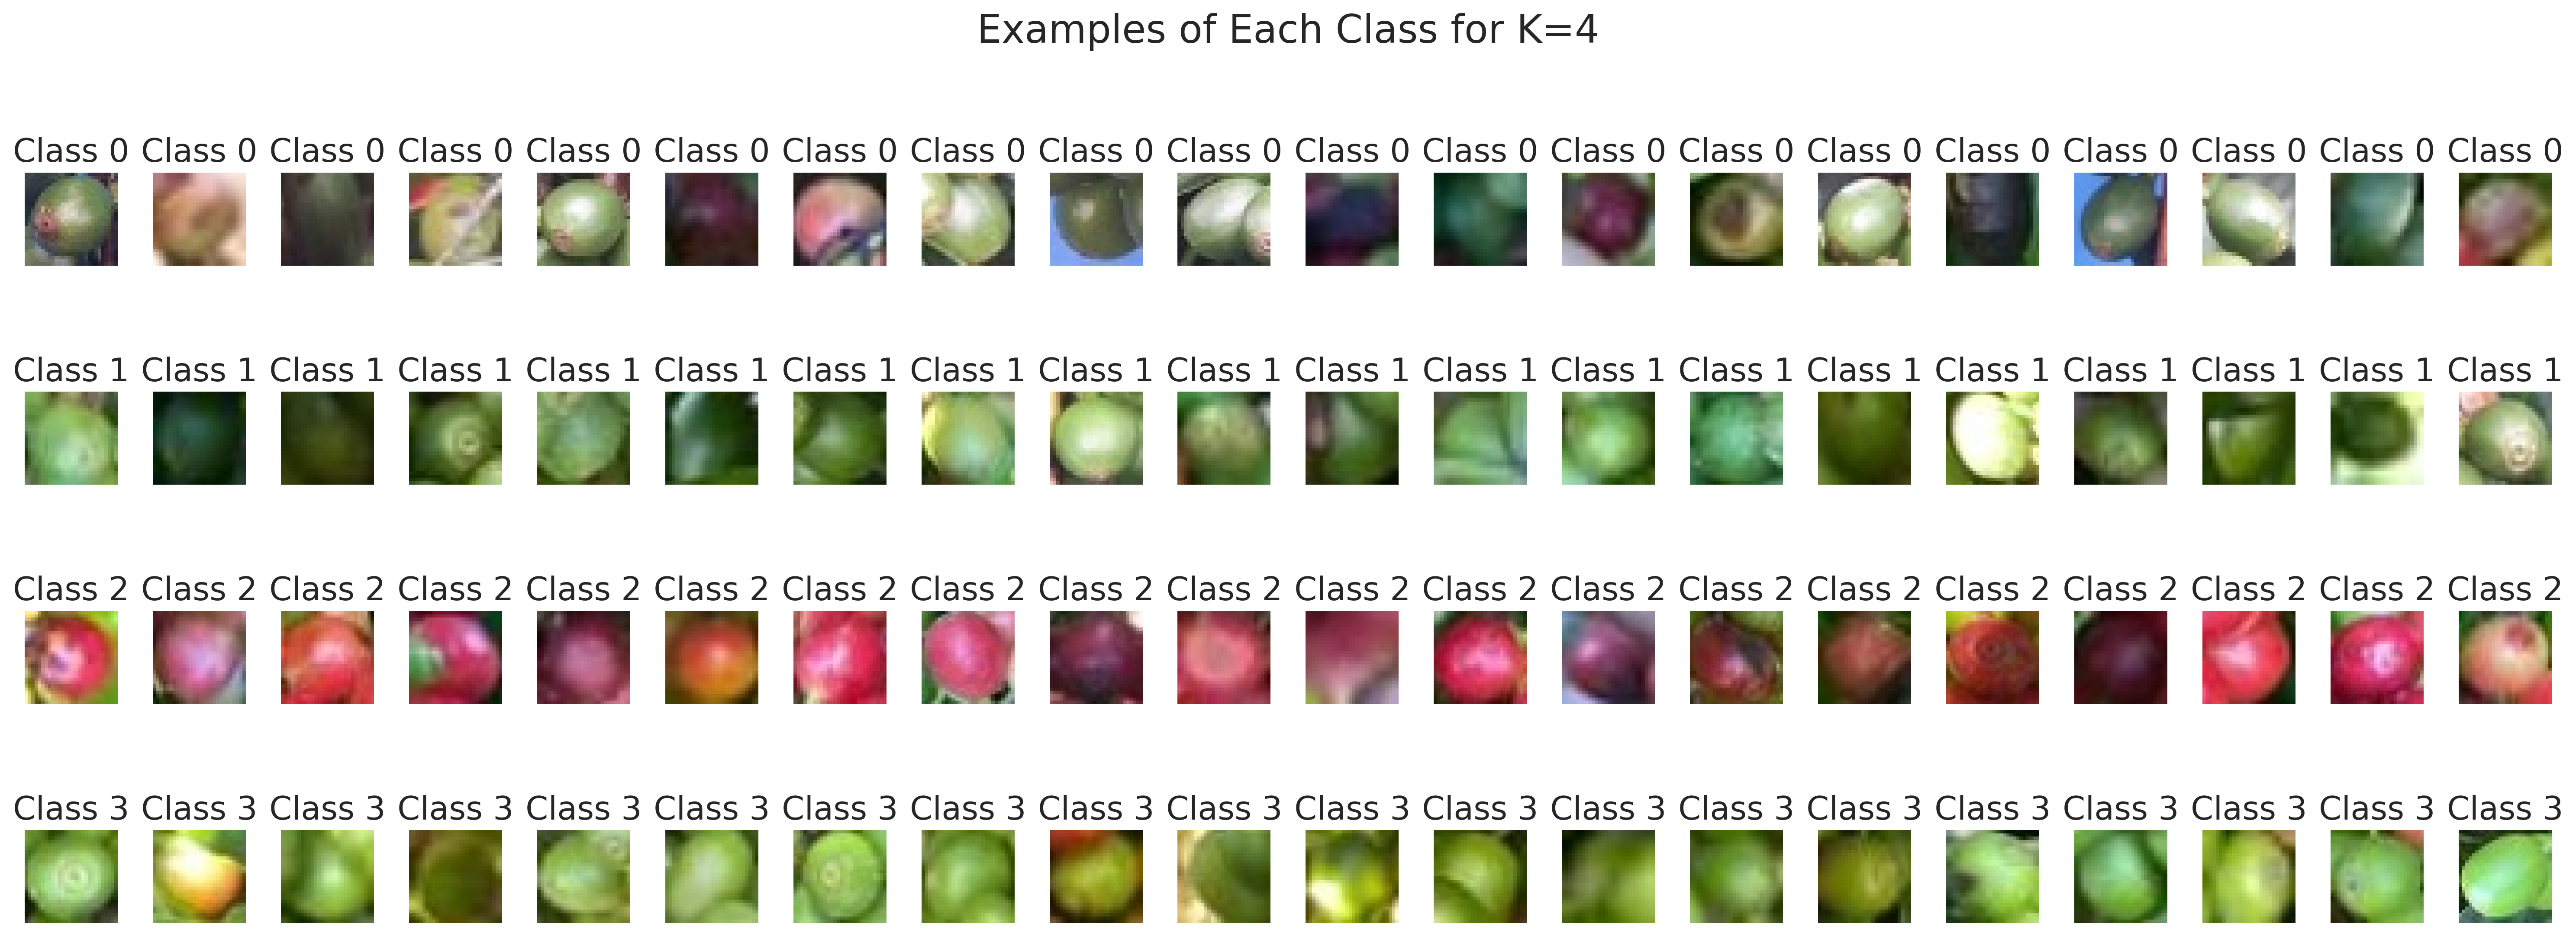

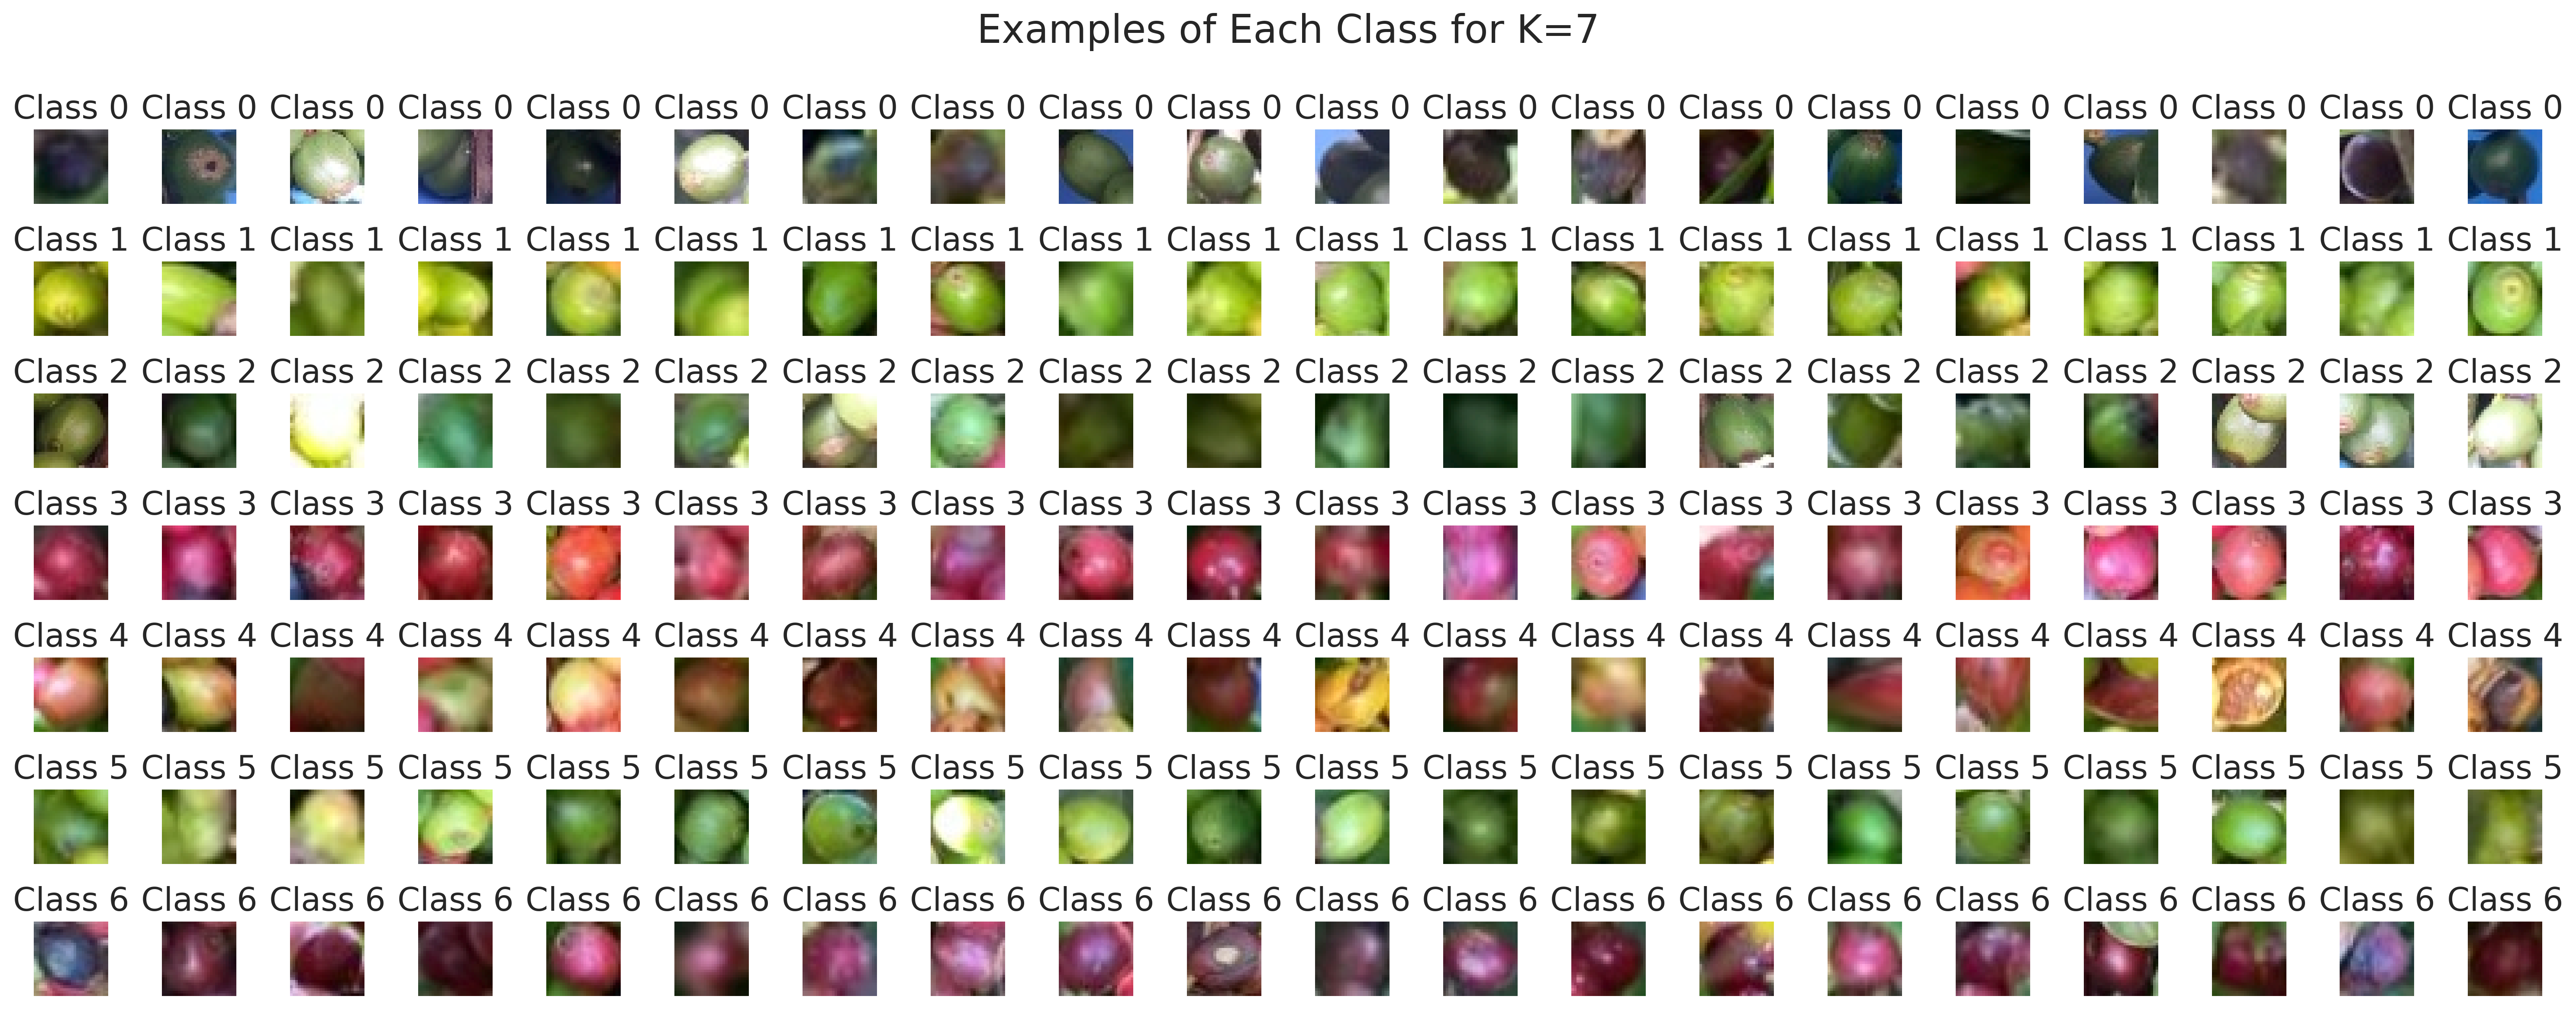

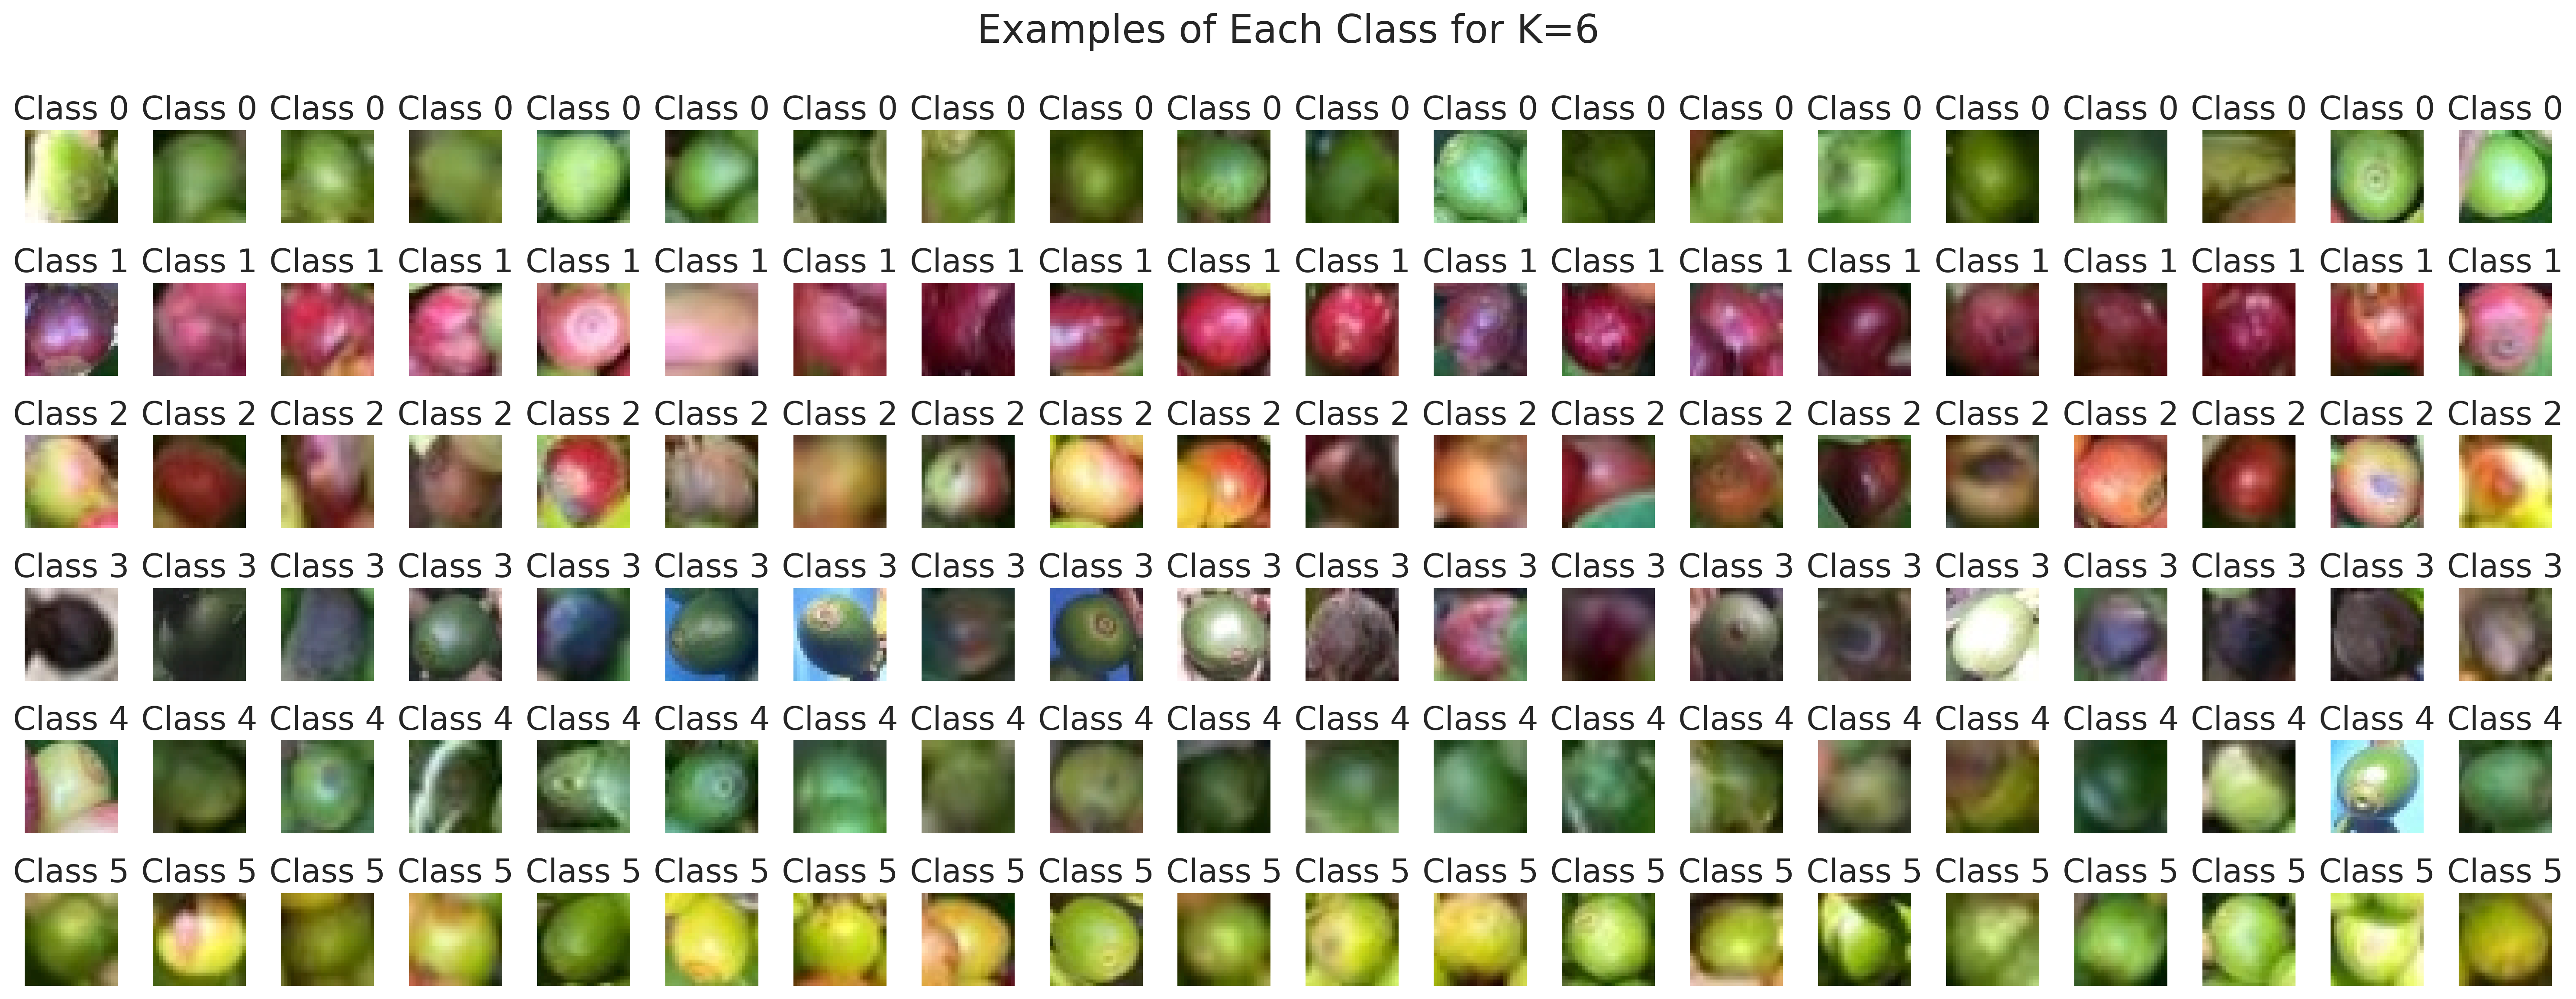

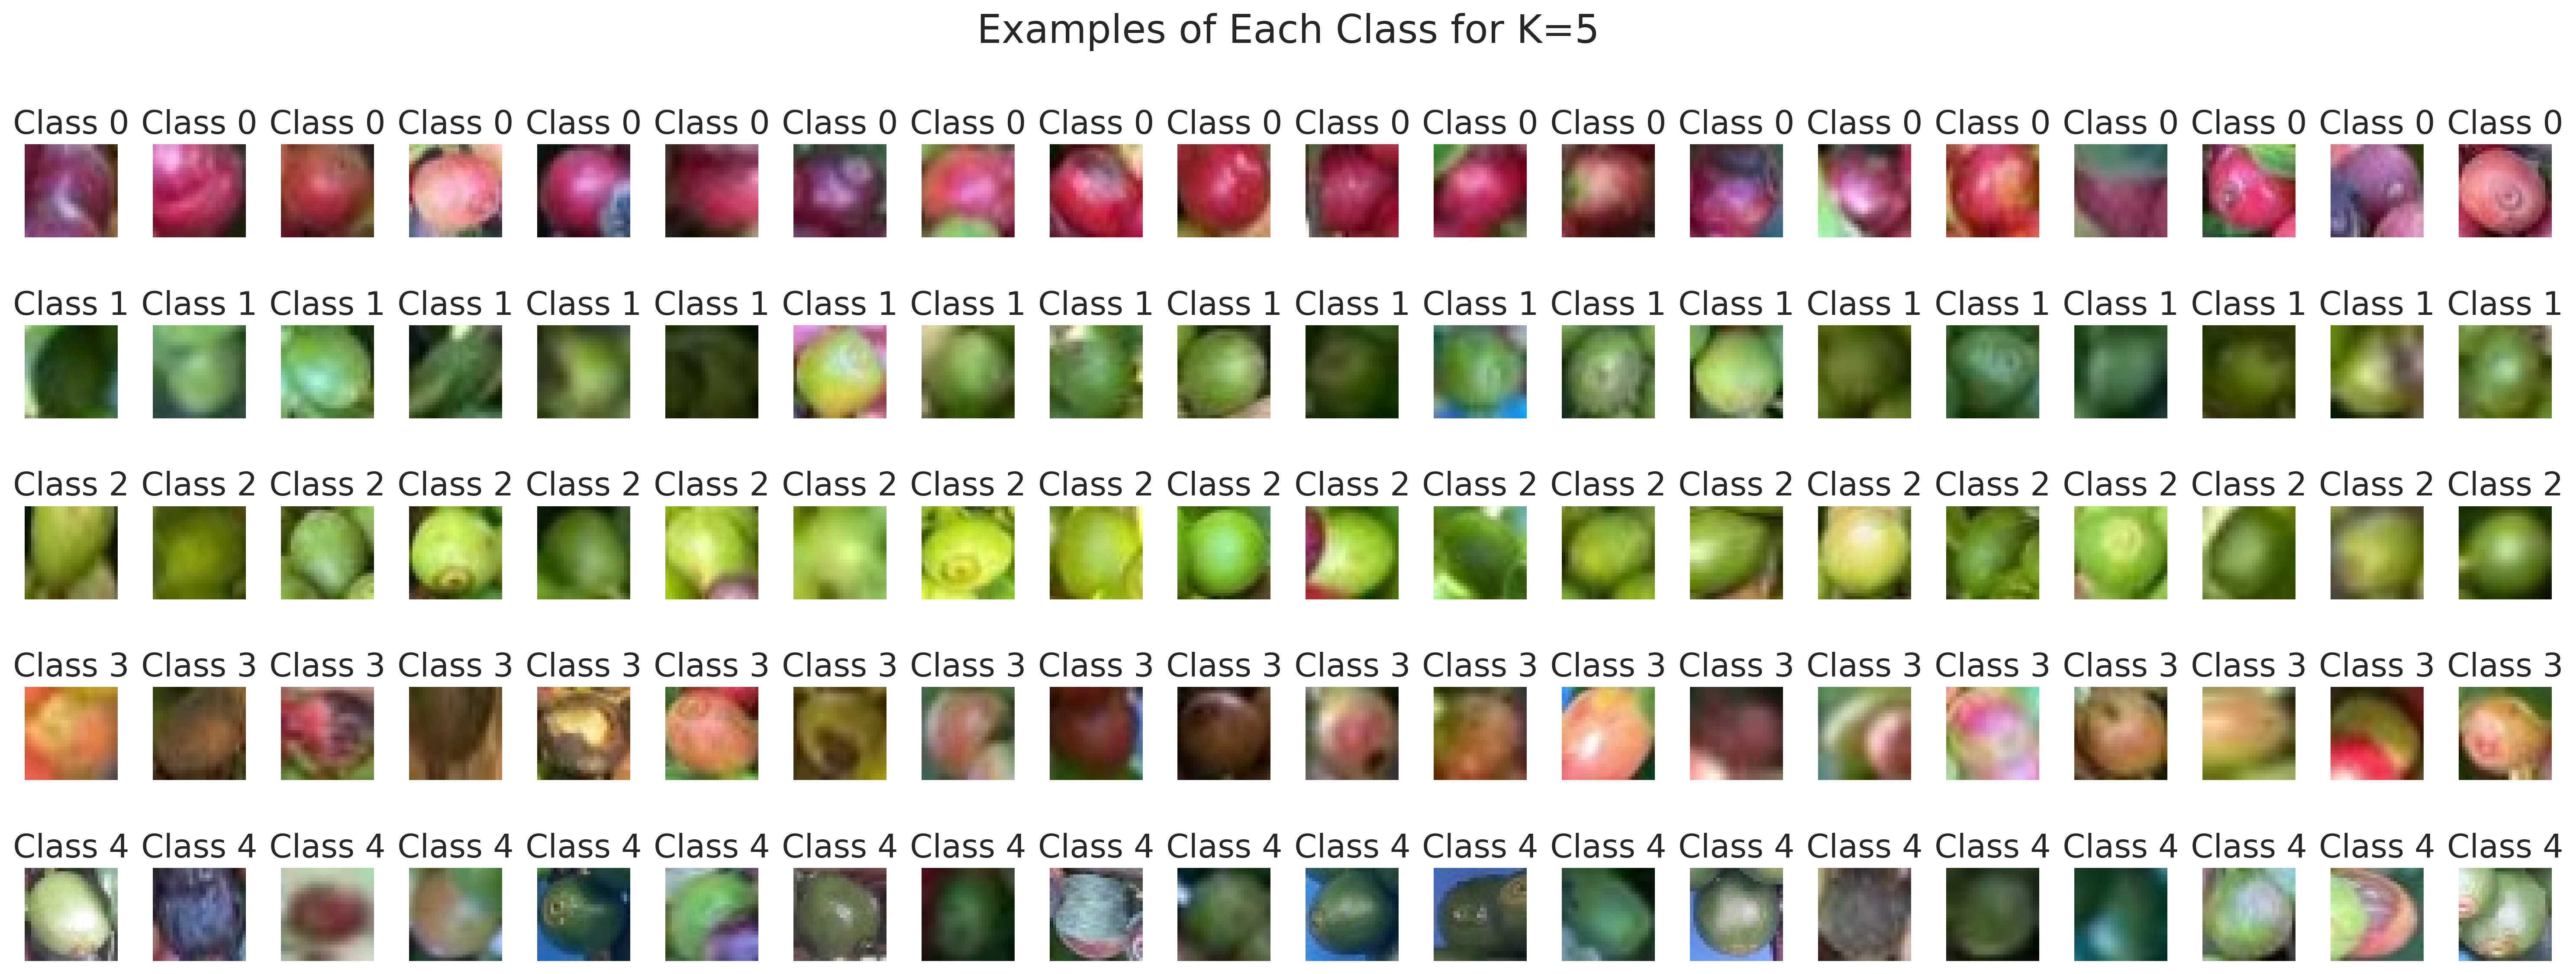

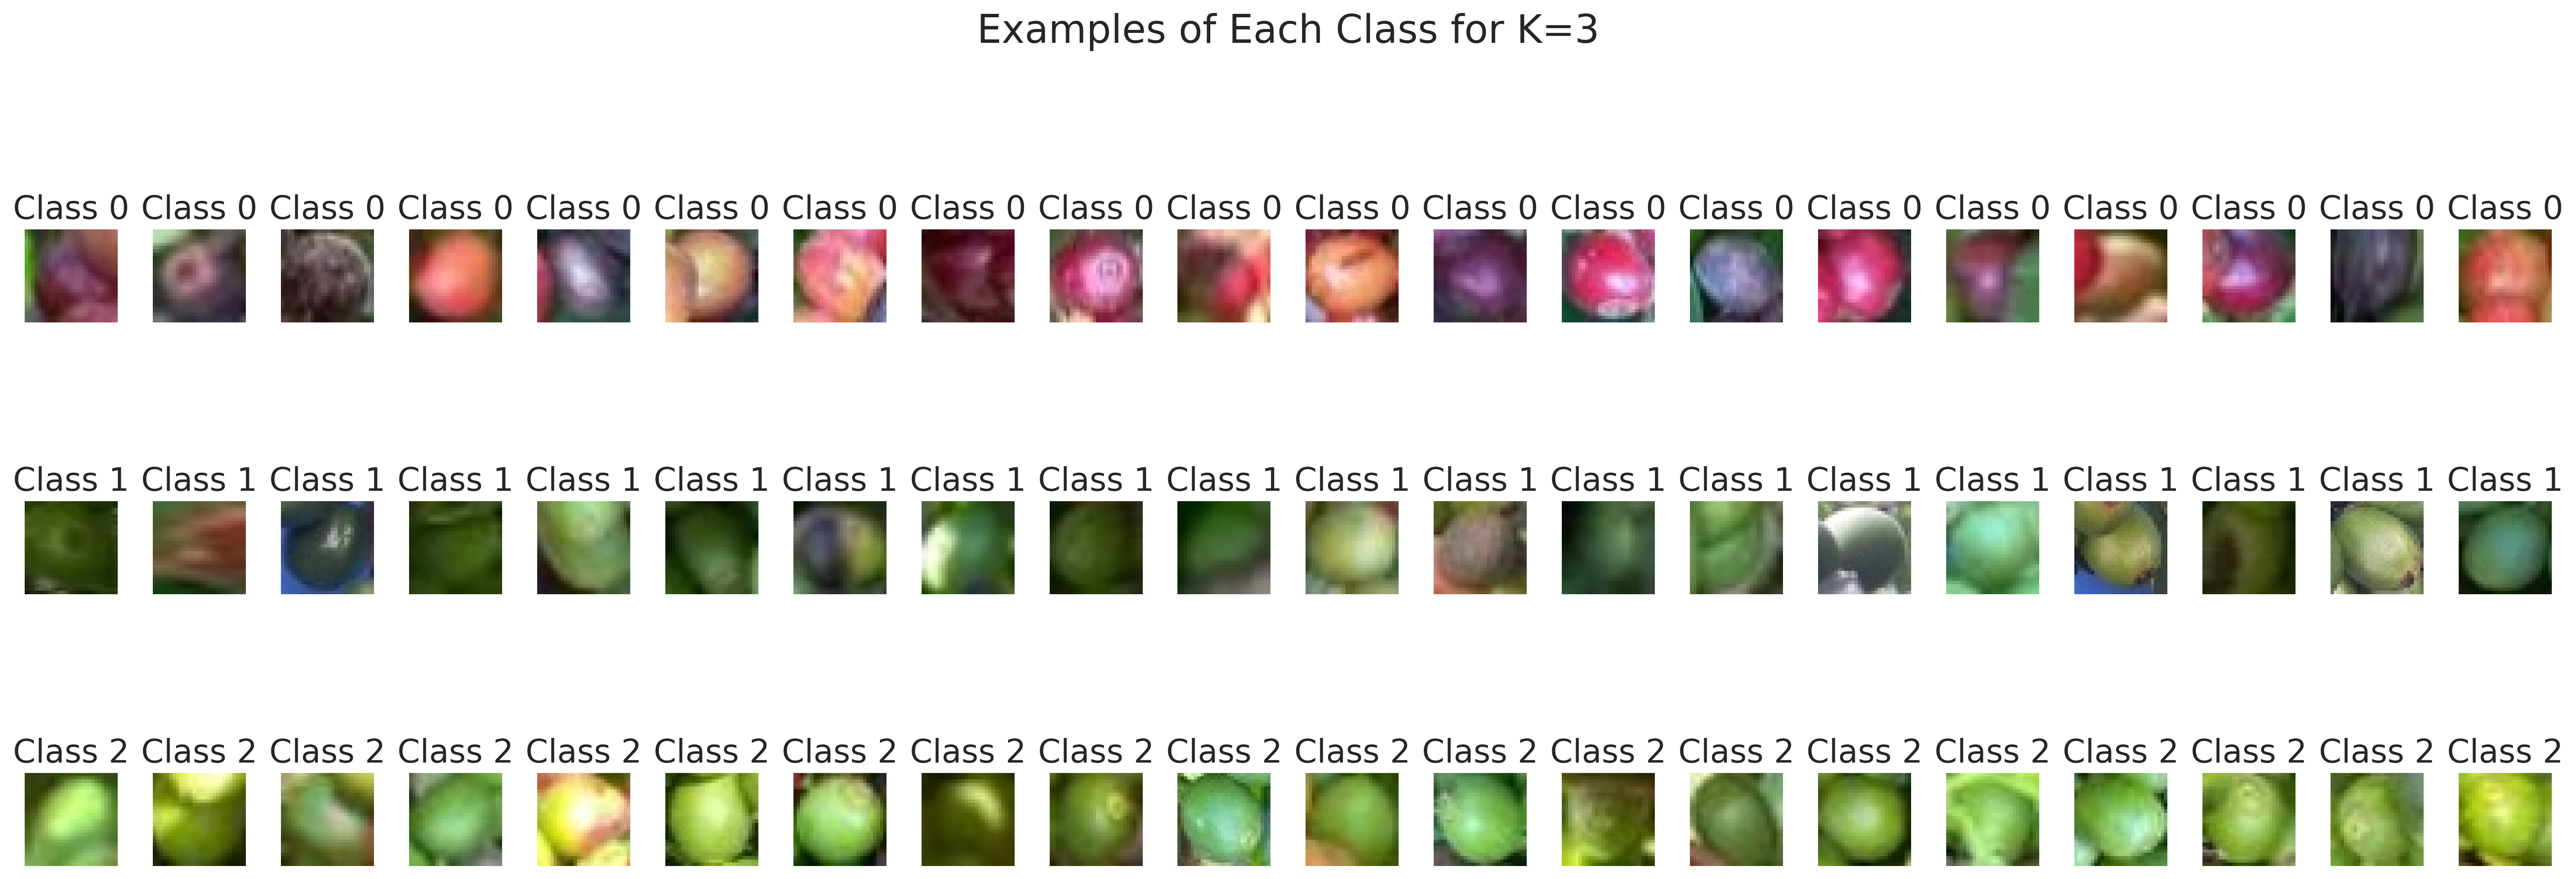

In [ ]:
import cv2

num_examples = 20

# loop over the models dictionary
for k, model in models.items():
    # predict the labels for the examples in the dataset
    labels = model.predict(np.array(data_ab))
    
    # create a figure with a subplot for each class
    fig, axes = plt.subplots(int(k), num_examples, figsize=(20, 8))
    fig.set_dpi(300)
    
    # loop over the classes
    for i in range(int(k)):
        # find the indices of the examples in the dataset that belong to the current class
        indices = np.where(labels == i)[0]
        
        # randomly sample num_examples indices from the current class
        sampled_indices = np.random.choice(indices, size=num_examples, replace=False)
        
        # plot examples of the current class
        for j, index in enumerate(sampled_indices):
            # convert from LAB to RGB color space
            img_rgb = cv2.cvtColor(data_lab[index].reshape(28,28,3), cv2.COLOR_LAB2RGB)
            axes[i][j].imshow(img_rgb)
            axes[i][j].set_title(f"Class {i}")
            axes[i][j].axis('off')
    
    plt.suptitle(f"Examples of Each Class for K={k}")
    plt.tight_layout()
    plt.show()


In [ ]:
 import cv2

num_examples = 20

# loop over the models dictionary
for k, model in models.items():
    # predict the labels for the examples in the dataset
    
    labels = model.predict(np.array(data_ab))
    # create a figure with a subplot for each class
    fig, axes = plt.subplots(k, num_examples, figsize=(20, 8))
    fig.set_dpi(300)
    # loop over the classes
    for i in range(k):
        # find the indices of the examples in the dataset that belong to the current class
        indices = np.where(labels == i)[0][:num_examples]
        # plot examples of the current class
        for j, index in enumerate(indices):
            # convert from LAB to RGB color space
            img_rgb = cv2.cvtColor(data_lab[index].reshape(28,28,3), cv2.COLOR_LAB2RGB)
            axes[i][j].imshow(img_rgb)
            axes[i][j].set_title(f"Class {i}")
            axes[i][j].axis('off')
    plt.suptitle(f"Examples of Each Class for K={k}")
    plt.tight_layout()
    plt.show()


NameError: ignored

In [ ]:
cd /content/drive/MyDrive/coffe_fruits_scale

/content/drive/MyDrive/coffe_fruits_scale


In [ ]:
import pickle

save_path = "models/"
for k, model in models.items():
    file_path = f"{save_path}kmeans_{k}.pkl"
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)


In [ ]:
ls

annotations/  fruits/  models/


In [ ]:

import cv2
def unsupervised_annotation(_model,folder,k):
    label_folder = folder + '/labels/'
    os.makedirs(folder + '/unsupervised_{}_label'.format(k), exist_ok=True)
    new_label_folder = folder + '/unsupervised_{}_label'.format(k)
    img_folder = folder + '/images/'

    for img_file in os.listdir(img_folder):
        name, extension = os.path.splitext(img_file)
        text_file = os.path.join(label_folder, name + '.txt')
        new_text_file = os.path.join(new_label_folder, name + '.txt')
        img_path = os.path.join(img_folder, img_file) 

        # Load the image
        img = cv2.imread(img_path)

        # Read the label file
        with open(text_file, 'r') as f:
            lines = f.readlines()

        # Extract the bounding box coordinates and labels for each object
        objects = []
        for line in lines:
            # Convert the label line to a list of values
            label_list = line.strip().split(' ')

            # Extract the bounding box coordinates
            x_center = float(label_list[1])
            y_center = float(label_list[2])
            width = float(label_list[3])
            height = float(label_list[4])

            # Calculate the top-left and bottom-right coordinates of the bounding box
            x_top_left = int((x_center - (width / 2)) * img.shape[1])
            y_top_left = int((y_center - (height / 2)) * img.shape[0])
            x_bottom_right = int((x_center + (width / 2)) * img.shape[1])
            y_bottom_right = int((y_center + (height / 2)) * img.shape[0])

            # Crop the region corresponding to the bounding box and resize to 28x28x3
            object_img = img[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
            
            if object_img.size == 0:
                continue  # skip empty image
            try:
                object_img = cv2.resize(object_img, (28,28))
            except cv2.error as e:
                print(f"Error: {e}")
                continue  # skip invalid image
            

            cv2_imshow(object_img)
            object_img_rgb = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)
            object_img_lab = cv2.cvtColor(object_img_rgb, cv2.COLOR_RGB2LAB)
            img_ab = object_img_lab[:, :, 1:]  # extract a,b channels from LAB image
            img_ab_vect = np.reshape(img_ab, (28*28*2))  # vectorize a,b channels
            img_ab_vect = img_ab_vect.astype('float32')  # convert to float32
            img_ab_vect /= 255.0  # normalize to [0, 1]
            img_ab_vect = np.array(img_ab_vect)

            # Add the object and its label to the list
            label = int(label_list[0])
            objects.append((img_ab_vect.reshape(1,-1), label, x_top_left, y_top_left, x_bottom_right, y_bottom_right))

        # Make predictions for the objects using the given model
        predictions = [] 
        for obj in objects:
            vec = obj[0]
            vec = np.array(vec)
            prediction = _model.predict(vec)
            predictions.append(prediction)


        # Write the predicted labels to the label file
        with open(new_text_file, 'w') as f:
            for i, obj in enumerate(objects):
                label = predictions[i]
                x_center = ((obj[2] + obj[4]) / 2) / img.shape[1]
                y_center = ((obj[3] + obj[5]) / 2) / img.shape[0]
                width = (obj[4] - obj[2]) / img.shape[1]
                height = (obj[5] - obj[3]) / img.shape[0]
                f.write(f"{label} {x_center} {y_center} {width} {height}\n")


In [ ]:
import pickle

with open('/content/drive/MyDrive/coffe_fruits_scale/models/kmeans_5.pkl', 'rb') as f:
    model5 = pickle.load(f)


In [ ]:
model5

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=0)

In [ ]:
unsupervised_annotation(model5,'/content/drive/MyDrive/coffeAI-detector-first-gen', k=5)

In [ ]:
import pickle

with open('/content/drive/MyDrive/coffe_fruits_scale/models/kmeans_2.pkl', 'rb') as f:
    model2 = pickle.load(f)


In [ ]:
import os
unsupervised_annotation(model2,'/content/drive/MyDrive/coffeAI-detector-first-gen', k=2)

In [ ]:
import pickle

with open('/content/drive/MyDrive/coffe_fruits_scale/models/kmeans_7.pkl', 'rb') as f:
    model7 = pickle.load(f)


In [ ]:
import os
unsupervised_annotation(model7,'/content/drive/MyDrive/coffeAI-detector-first-gen', k=7)